Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "NiclausMikaelson"

---

# Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. 

Получаемая таким образом квадратурная схема *точно* инегрирует $f(x)$ если это полином степени $m\le2n-1$, где $n$ - степень полинома, корни которого используются в качестве узлов.

## Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

    hint:Легко найти точки и веса для отрезка [-1,1], после чего можно сделать аффинное преобразование..

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [7]:
import scipy.special
def gauss_2(a, b):
    r"""Return nodes and weights for a two-point Gauss quadrature on [a, b].
    
    Parameters
    ----------
    a, b : float
       Boundaries of the integration interval
       
    Returns
    -------
    x1, x2, w1, w2 : float
       Nodes and weights of the quadrature.
    """
    ns, ws = scipy.special.roots_legendre(2)
    x_1, x_2 = (a+b)/2+(b-a)/2 * ns[0], (a+b)/2+(b-a)/2 * ns[1]
    w_1, w_2 = (b-a)/2 * ws[0], (b-a)/2 * ws[1]
    return x_1, x_2, w_1, w_2

    

In [8]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Использование ортогональных полиномов

### Legendre

Теперь посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками".

In [9]:
Integral = 2/3
print(Integral)

0.6666666666666666


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в предыдущем дз). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [10]:
import numpy as np

In [12]:
def midpoint_rule(func, a, b, eps):
    I = float('inf')
    i = 0
    N = 2
    while i == 0:
        hk = (b - a) / N
        xk = np.linspace(a + hk / 2, b - hk / 2, N)
        Qk = [func(k) for k in xk]
        Q = np.sum(Qk) * hk
        if (abs(I - Q) < eps):
            break
        N *= 2
        I = Q
    return Q, N
func = lambda x: 7*x**3 - 8*x**2 - 3*x + 3
I, N = midpoint_rule(func, -1, 1, 1e-10)
print("I =", I, ", количество узлов", N+1)

I = 0.6666666666860692 , количество узлов 524289


3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), с помощью Гауссовой квадратуры (используя корни полинома Лежандра степени от 1 до 6 в качестве узлов) (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [13]:
from scipy.special import roots_legendre

In [14]:
def legendre_nodes_method(n, func): #n - степень полинома Лежандра
    
    x, w = roots_legendre(n)
    return np.sum(func(x)*w)
for i in range(1,7):
    print("I =", legendre_nodes_method(i, func), ", количество узлов:", i)

I = 6.0 , количество узлов: 1
I = 0.6666666666666674 , количество узлов: 2
I = 0.6666666666666639 , количество узлов: 3
I = 0.6666666666666667 , количество узлов: 4
I = 0.6666666666666685 , количество узлов: 5
I = 0.6666666666666695 , количество узлов: 6


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

Для корней полинома Лежандра нужно значительно меньше (6 против 524к) узлов для получения сравнимой точности. 



Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [15]:
a_func = lambda x: 5*(7*125*(x+1)**3 - 8*25*(x+1)**2 - 15*(x+1) + 3)
for i in range(1,7):
    print("I =", legendre_nodes_method(i, a_func), ", число узлов:", i)

I = 6630.0 , число узлов: 1
I = 14713.333333333332 , число узлов: 2
I = 14713.333333333336 , число узлов: 3
I = 14713.333333333332 , число узлов: 4
I = 14713.333333333328 , число узлов: 5
I = 14713.33333333333 , число узлов: 6


Сравните результат с точным значением интеграла.

In [16]:
Integral = 44140/3
print(Integral)


14713.333333333334


In [17]:
Integral - legendre_nodes_method(2, a_func)

1.8189894035458565e-12

### 

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит машинное $\epsilon$.


In [18]:
from scipy.special import roots_chebyt
def chebyt_nodes_method(n, func): #n - степень полинома Лежандра
    
    x, w = roots_chebyt(n)
    
    return np.sum(func(x)*w)
f = lambda x: np.cos(2*np.pi*x)/2
I = float('inf')
n = 1
while 0 == 0:
    i = chebyt_nodes_method(n, f)
    if I-i == 0:
        break
    I = i
    n +=1
print("I =", I, ", число узлов:", n-1)

I = 0.34601015881226443 , число узлов: 16


# Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Рассматривая данное уравнение на тех же узлах сетки $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.


Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \cos(x)  + \frac{1}{2\pi} \int_0^\pi \! \sin(x) \,t f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2\pi}$, ядро $K(x, t) = \sin(x)\cdot t$ и правая часть - $g(x) = \cos(x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006):

$$
f(x) = \cos(x)- \frac{2}{\pi}\sin(x)
$$

Для нахождения интеграла преобразуйте заменой переменных в интеграле область интегрирования в [0,1] воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Напишите функцию, возвращающую значение f(t_j) по схеме выше, которая в качестве параметра принимает величину $N$--число узлов в квадратуре, для нахождение решения СЛАУ можно использовать `scipy.linalg.solve`.

Постройте график истинного решения и набор (t_j, f_j) для раличных $N$, используя вашу функцию.

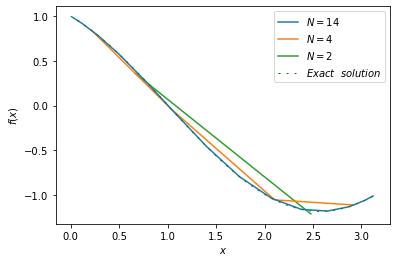

In [21]:
from scipy.linalg import solve as lg
import matplotlib.pyplot as plt
fr = lambda x: np.cos(x) - (2/np.pi) * np.sin(x)
x_lin = np.linspace(0, np.pi, 100)
def shift_Legendre(N):
    roots, weights = scipy.special.roots_sh_legendre(N)
    I_ = np.eye(N)
    A = np.vectorize(lambda x, t: np.sin(np.pi * x) * t)
    A_ = np.pi * 0.5 * np.array([weights * A(t, roots) for t in roots]) - I_
    g = lambda x: np.cos(np.pi * x)
    g_ = - g(roots)
    f_ = lg(A_, g_)
    return f_, roots, weights

N_ = [14, 4, 2]
for N in N_:

    f_, roots, _ = shift_Legendre(N)
    x = roots * np.pi
    plt.plot(x, f_, label=('$N = %s$' % N), zorder=N, linewidth=1.5)
    
plt.plot(x_lin, fr(x_lin), '--', dashes=(2,6), linewidth=1, zorder=20, label='$Exact~~solution$', color='green')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()


     


Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их расположение.

Оказывается, интерполяционные методы (мы обсудим их на следующих занятиях) работают не очень хорошо, в сравнении с следующим подходом:

Используйте изначальный вид, чтобы вычислить значение функции на всём интервале:

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным решением для разлиных $N$.
(выбирайте наглядный масштаб)

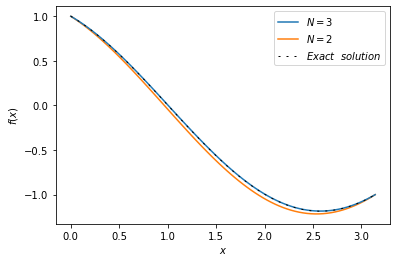

In [23]:
x_lin = np.linspace(0, np.pi, 77)
K = np.vectorize(lambda x, t: np.sin(np.pi * x) * t)
g = lambda x: np.cos(np.pi * x)

N_ = [3, 2]
for N in N_:
    f_unity, roots, weights = shift_Legendre(N)

    func = lambda x: g(x) + 0.5 * np.pi * (weights * K(x, roots) * f_unity).sum()
    f_lin = np.array([func(x) for x in x_lin/np.pi])
    plt.plot(x_lin, f_lin, label=('$N = %s$' % N), zorder=N, linewidth=1.5)

fr = lambda x: np.cos(x) - (2 / np.pi) * np.sin(x)


plt.plot(x_lin, fr(x_lin), '--', dashes=(2,6), linewidth=1, zorder=20, alpha=1, label='$Exact~~solution$', color='black')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

# Часть 3. Интеграл от осциллирующей функции - EXTRA points task

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [ ]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [ ]:
from scipy.integrate import quad

def integ():
    """Return a single float, the computed value of the integral."""
    

In [ ]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
